In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
initialDfMete = pd.read_csv("data/Metereologia.csv")
initialDfCont = pd.read_csv("data/Contaminantes.csv")

In [3]:
initialDfMete.head()

,Unnamed: 0,date,parameter,SE,SE_b,NE,NE_b,CE,CE_b,NO,...,SO2,SO2_b,SE3,SE3_b,SUR,SUR_b,Norte2,NTE2_b,NE3,NE3_b
0,239459,2021-07-01 00:00:00,TOUT,NaN,x,NaN,x,NaN,x,NaN,...,NaN,x,NaN,x,NaN,x,NaN,x,NaN,x
1,239460,2021-07-01 00:00:00,RH,NaN,x,NaN,x,NaN,x,NaN,...,NaN,x,NaN,l,NaN,l,NaN,l,NaN,x
2,239461,2021-07-01 00:00:00,SR,NaN,x,0.0,l,0.0,l,0.0,...,0.0,l,0.0,l,0.0,l,0.0,l,0.0,x
3,239462,2021-07-01 00:00:00,PRS,NaN,x,NaN,x,NaN,x,NaN,...,NaN,x,NaN,l,NaN,l,NaN,l,NaN,x
4,239463,2021-07-01 00:00:00,RAINF,NaN,x,NaN,x,NaN,x,NaN,...,NaN,x,NaN,l,NaN,l,NaN,l,NaN,x


In [4]:
initialDfCont.head()

,Unnamed: 0,date,parameter,SE,SE_b,NE,NE_b,CE,CE_b,NO,...,SO2,SO2_b,SE3,SE3_b,SUR,SUR_b,Norte2,NTE2_b,NE3,NE3_b
0,205739,2021-07-01 00:00:00,PM10,NaN,x,NaN,x,NaN,x,NaN,...,NaN,x,NaN,l,NaN,l,NaN,l,NaN,x
1,205740,2021-07-01 00:00:00,PM2.5,NaN,x,NaN,x,NaN,x,NaN,...,NaN,x,NaN,l,NaN,l,NaN,l,NaN,x
2,205741,2021-07-01 00:00:00,O3,NaN,x,NaN,x,NaN,x,NaN,...,NaN,x,NaN,l,NaN,l,NaN,l,NaN,x
3,205742,2021-07-01 00:00:00,SO2,NaN,x,NaN,x,NaN,x,NaN,...,NaN,x,NaN,l,NaN,l,NaN,l,NaN,x
4,205743,2021-07-01 00:00:00,NO2,NaN,e,NaN,x,NaN,x,NaN,...,NaN,e,NaN,e,NaN,e,NaN,e,NaN,e


In [5]:
columns = ["date", "parameter", "NE", "NE_b"]
dfMete = initialDfMete[columns]

In [17]:
locations = {
        "Guadalupe, La Pastora" : "SE",
        "San Nicolás de los Garzas, San Nicolás" : "NE",
        "Monterrey, Obispado" : "CE",
        "Monterrey, San Bernabé": "NO",
        "Santa Catarina, Santa Catarina": "SO",
        "García, García" : "NO2",
        "Escobedo, Escobedo": "NTE",
        "Apodaca, Apodaca" : "NE2",
        "Juárez, Juárez" : "SE2",
        "San Pedro Garza García, San Pedro": "SO2"
        }

meteo_params = ['TOUT', 'RH', 'SR', 'RAINF', 'PRS', 'WSR', 'WDR']
cont_params = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2', 'CO']

In [18]:
def clean_data(station: str, dataframe: pd.DataFrame, type: str) -> pd.DataFrame:

    # Get value of key
    # Try and catch in case the station is not in the dictionary
    try:
        location = locations[station]
    except:
        raise ValueError('Station not found')

    # Columns
    dataframe.parameter = dataframe.parameter.str.strip()
    dataframe = pd.pivot(dataframe, index='date', columns=['parameter'], values=[location, f'{location}_b'])
    dataframe.columns = [f'{location}-' + col[1] if col[0] == location else f'{location}_b-' + col[1] for col in dataframe.columns]
    dataframe.reset_index(inplace=True)
    dataframe.date = pd.to_datetime(dataframe.date)

    if type == 'meteo':
        for param in paramMeteo:
            dataframe[f'{location}-{param}'] = dataframe[f'{location}-{param}'].astype(float)

    elif type == 'cont':

        for param in paramConta:
            dataframe[f'{location}-{param}'] = pd.to_numeric(dataframe[f'{location}-{param}'], errors='coerce')

    else:
        raise ValueError('Type must be meteo or cont')

    return dataframe

In [19]:
dfMete.head()

,date,parameter,NE,NE_b
0,2021-07-01 00:00:00,TOUT,NaN,x
1,2021-07-01 00:00:00,RH,NaN,x
2,2021-07-01 00:00:00,SR,0.0,l
3,2021-07-01 00:00:00,PRS,NaN,x
4,2021-07-01 00:00:00,RAINF,NaN,x


In [20]:
dfCont = initialDfCont[columns]

In [21]:
dfMete.head()

,date,parameter,NE,NE_b
0,2021-07-01 00:00:00,TOUT,NaN,x
1,2021-07-01 00:00:00,RH,NaN,x
2,2021-07-01 00:00:00,SR,0.0,l
3,2021-07-01 00:00:00,PRS,NaN,x
4,2021-07-01 00:00:00,RAINF,NaN,x


In [22]:
dfCont.head()

,date,parameter,NE,NE_b
0,2021-07-01 00:00:00,PM10,NaN,x
1,2021-07-01 00:00:00,PM2.5,NaN,x
2,2021-07-01 00:00:00,O3,NaN,x
3,2021-07-01 00:00:00,SO2,NaN,x
4,2021-07-01 00:00:00,NO2,NaN,x


In [26]:
dfm = clean_data('San Nicolás de los Garzas, San Nicolás', dfMete, 'meteo')
dfc = clean_data('San Nicolás de los Garzas, San Nicolás', dfCont, 'cont')
dfc

/var/folders/j_/kb3fq6hn5m1bfxm6rj3k2ng40000gn/T/ipykernel_18339/829524499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.parameter = dataframe.parameter.str.strip()
/var/folders/j_/kb3fq6hn5m1bfxm6rj3k2ng40000gn/T/ipykernel_18339/829524499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.parameter = dataframe.parameter.str.strip()


,date,NE-CO,NE-NO2,NE-O3,NE-PM10,NE-PM2.5,NE-SO2,NE_b-CO,NE_b-NO2,NE_b-O3,NE_b-PM10,NE_b-PM2.5,NE_b-SO2
0,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,a,x,x,x,x,x
1,2021-07-01 01:00:00,1.77,2.500000,28.0,21.0,6.0,1.9,,,,,,
2,2021-07-01 02:00:00,1.79,3.500000,32.0,16.0,NaN,1.8,,,,,x,
3,2021-07-01 03:00:00,1.80,3.900000,26.0,23.0,NaN,1.9,,,,,x,
4,2021-07-01 04:00:00,1.78,2.500000,26.0,29.0,NaN,2.0,,,,,x,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,2022-09-30 19:00:00,1.39,16.100000,42.0,45.0,18.0,2.3,,,,,,
10955,2022-09-30 20:00:00,1.64,25.799999,24.0,54.0,27.0,2.3,,,,,,
10956,2022-09-30 21:00:00,1.55,22.500000,28.0,65.0,27.0,2.4,,,,,,
10957,2022-09-30 22:00:00,1.50,20.200001,29.0,62.0,25.0,2.3,,,,,,


### Porcentaje de valores vacíos en el dataframe de contaminantes

In [12]:
print(
    f"Porcentaje de valores vacíos en el dataframe de contaminantes {(dfCont.isnull().sum().sum() * 100) / dfCont.size :.2%}.")

Porcentaje de valores vacíos en el dataframe de contaminantes 67.83%.


### Porcentaje de valores vacíos en el dataframe de la meteorología

In [13]:
print(
    f"Porcentaje de valores vacíos en el dataframe de la meteorología {(dfMete.isnull().sum().sum() * 100) / dfMete.size :.2%}.")

Porcentaje de valores vacíos en el dataframe de la meteorología 28.97%.


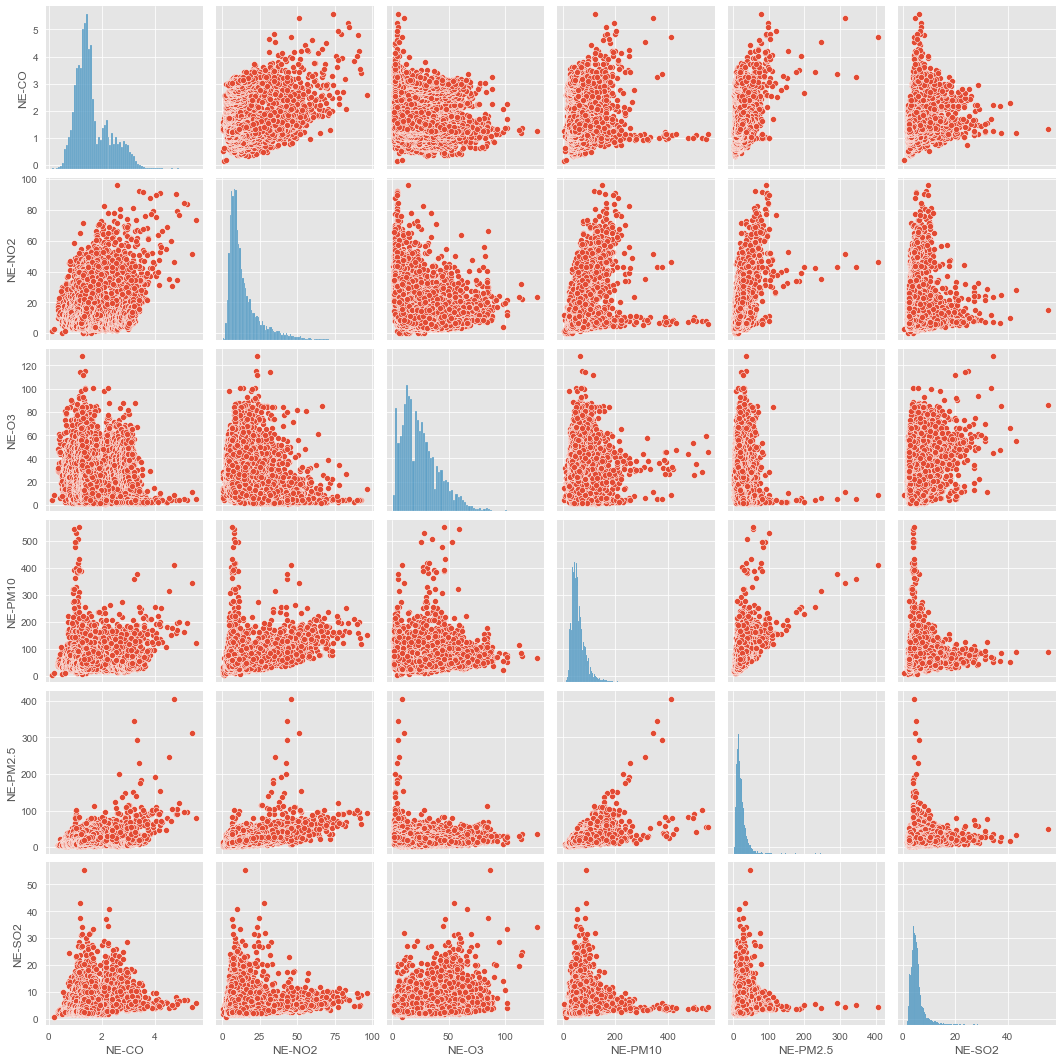

In [27]:
# Plot the distribution of every contaminant
sns.pairplot(dfc)